In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
import tensorflow as tf

2023-10-06 14:17:51.194026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_32867/889244835.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [7]:
df['Outlet_Size'].value_counts()

Medium    3044
Small     1398
High       558
Name: Outlet_Size, dtype: int64

In [8]:
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Identifier'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [9]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df_sub = df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [12]:
# normalizing the data Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sub[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.fit_transform(df_sub[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
df_sub.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [13]:
X = pd.get_dummies(df_sub.drop(['Item_Outlet_Sales'], axis=1))
y = df_sub['Item_Outlet_Sales']
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [14]:
X.shape, y.shape

((5000, 41), (5000,))

In [15]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 41), (4000,)), ((1000, 41), (1000,)))

In [16]:
# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense

In [17]:
# number of input neurons
X_train.shape

(4000, 41)

In [18]:
# number of features in the data
X_train.shape[1]

41

In [19]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

41

In [20]:
# define number of output neurons
output_neurons = 1

In [21]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 80
neuron_hidden_layer_2 = 40
neuron_hidden_layer_3 = 20


In [22]:
from keras.optimizers import Adam
# defining the architecture of the model
# Define the model
model = Sequential()

model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001), metrics=['mae'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3360      
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6641 (25.94 KB)
Trainable params: 6641 (25.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400)

Epoch 1/400


125/125 [==============================] - 1s 2ms/step - loss: 7624415.5000 - mae: 2173.0447 - val_loss: 7150946.5000 - val_mae: 2066.7029
Epoch 2/400
125/125 [==============================] - 0s 1ms/step - loss: 6114836.5000 - mae: 1838.5911 - val_loss: 4401769.5000 - val_mae: 1473.7480
Epoch 3/400
125/125 [==============================] - 0s 1ms/step - loss: 3242747.0000 - mae: 1293.9894 - val_loss: 2517301.2500 - val_mae: 1200.2748
Epoch 4/400
125/125 [==============================] - 0s 1ms/step - loss: 2401183.0000 - mae: 1206.2974 - val_loss: 2341291.0000 - val_mae: 1202.6135
Epoch 5/400
125/125 [==============================] - 0s 1ms/step - loss: 2267240.2500 - mae: 1185.7405 - val_loss: 2228504.7500 - val_mae: 1163.4055
Epoch 6/400
125/125 [==============================] - 0s 1ms/step - loss: 2164709.0000 - mae: 1145.4685 - val_loss: 2134268.7500 - val_mae: 1134.5491
Epoch 7/400
125/125 [==============================] - 0s 1ms/step - loss: 2079179.8750 - mae: 1114.4761 -

In [24]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 973us/step - loss: 1141430.1250 - mae: 756.1995


In [25]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


32/32 [==============================] - 0s 730us/step
R2 Score: 0.6046330932654591


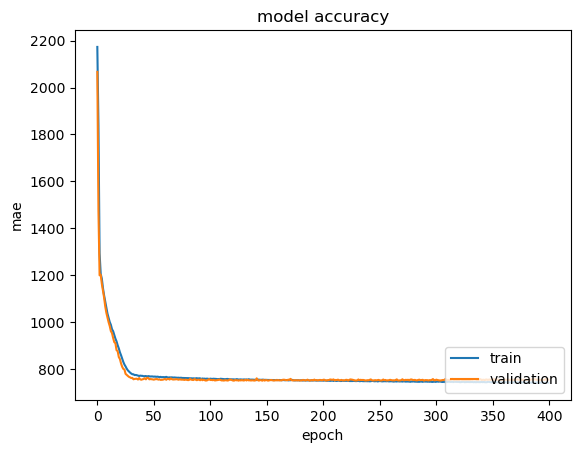

In [26]:
# summarize history for loss
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [27]:
# 0.605356359282686